In [1]:
import os
import pandas as pd

reviews = pd.read_csv('ign.csv')

reviews.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [4]:
reviews.shape

(18625, 11)

In [5]:
reviews.index

RangeIndex(start=0, stop=18625, step=1)

In [6]:
reviews.plot

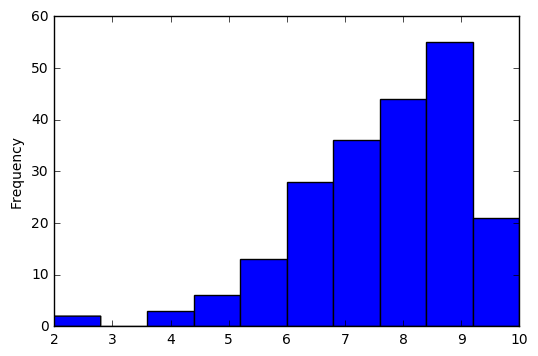

In [11]:
%matplotlib inline
reviews[reviews['platform'] == 'Xbox One']['score'].plot(kind = 'hist')

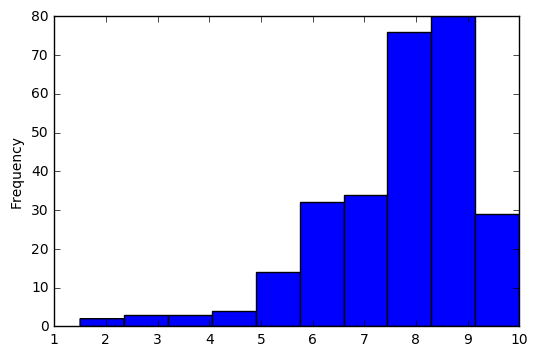

In [13]:
reviews[reviews['platform'] == 'PlayStation 4']['score'].plot(kind = 'hist')

In [2]:
food = pd.read_csv('thanksgiving-2015-poll-data.csv', encoding='Latin-1')

In [3]:
food.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [18]:
food['Do you celebrate Thanksgiving?'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
food.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [22]:
food['What is your gender?'].unique()

array(['Male', 'Female', nan], dtype=object)

In [24]:
food['What is your gender?'].value_counts(dropna = False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [31]:
import math
food['gender'] = food['What is your gender?'].apply(lambda x: x if (isinstance(x, float) and math.isnan(x)) else int(x == 'Female'))

In [32]:
food['gender'].value_counts(dropna = False)

 1.0    544
 0.0    481
NaN      33
Name: gender, dtype: int64

In [41]:
#food.apply(lambda x : x.dtype) == 'int'

'int') was unexpected at this time.


In [45]:
import numpy as np

def clean_income(value):
    if value == '$200,000 and up':
        return 200000
    elif value == 'Prefer not to answer':
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    value = value.replace(',','').replace('$','')
    income_high, income_low = value.split(' to ')
    return (int(income_high) + int(income_low))/2

In [46]:
food['income'] = food['How much total combined money did all members of your HOUSEHOLD earn last year?'].apply(clean_income)
food['income'].head()

0     87499.5
1     62499.5
2      4999.5
3    200000.0
4    112499.5
Name: income, dtype: float64

In [48]:
grouped = food.groupby('What type of cranberry saucedo you typically have?')
grouped

In [49]:
grouped.groups

{'Canned': [4,
  6,
  8,
  11,
  12,
  15,
  18,
  19,
  26,
  27,
  38,
  43,
  48,
  53,
  58,
  59,
  60,
  68,
  69,
  71,
  74,
  76,
  79,
  80,
  86,
  87,
  89,
  90,
  91,
  97,
  103,
  106,
  107,
  109,
  115,
  116,
  118,
  119,
  123,
  127,
  129,
  130,
  132,
  135,
  136,
  137,
  140,
  141,
  143,
  144,
  145,
  150,
  153,
  155,
  156,
  157,
  158,
  159,
  161,
  162,
  163,
  166,
  167,
  168,
  169,
  173,
  179,
  180,
  181,
  182,
  184,
  186,
  190,
  192,
  193,
  195,
  198,
  199,
  200,
  204,
  205,
  207,
  209,
  210,
  211,
  212,
  213,
  215,
  217,
  218,
  220,
  222,
  224,
  226,
  229,
  230,
  231,
  239,
  243,
  245,
  247,
  250,
  251,
  253,
  257,
  258,
  260,
  266,
  267,
  269,
  270,
  271,
  272,
  273,
  276,
  277,
  278,
  279,
  280,
  282,
  283,
  284,
  288,
  289,
  293,
  294,
  296,
  297,
  304,
  305,
  307,
  308,
  309,
  310,
  315,
  317,
  318,
  320,
  322,
  325,
  326,
  330,
  334,
  335,
  339,
  340,
 

In [51]:
grouped.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [54]:
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Canned
(502, 67)
<class 'pandas.core.frame.DataFrame'>
Homemade
(301, 67)
<class 'pandas.core.frame.DataFrame'>
None
(146, 67)
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
(25, 67)
<class 'pandas.core.frame.DataFrame'>


In [61]:
for group in grouped:
    print(group[1]['income'].mean())

83823.40340909091
94878.1072874494
78886.08403361344
86629.97826086957


In [65]:
grouped['income'].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    83823.403409
Homemade                  94878.107287
None                      78886.084034
Other (please specify)    86629.978261
Name: income, dtype: float64

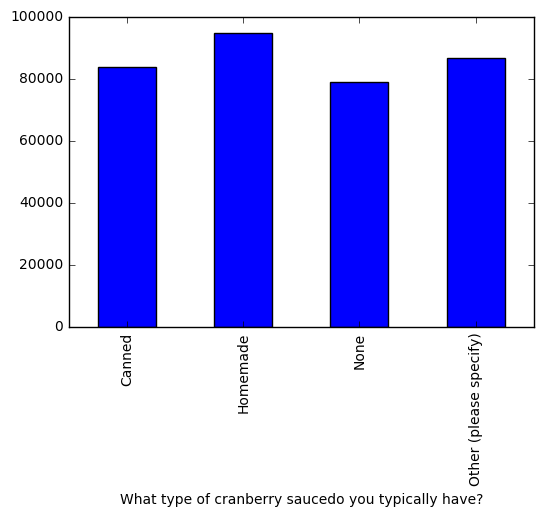

In [66]:
sauce = grouped.agg(np.mean)
sauce['income'].plot(kind='bar')

In [68]:
grouped = food.groupby(["What type of cranberry saucedo you typically have?", "What is typically the main dish at your Thanksgiving dinner?"])

In [72]:
grouped['income'].agg([np.mean, np.std, np.sum]).head(25)

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.600000   
                                                   Ham/Pork                                             77499.535714   
                                                   I don't know                                          4999.500000   
                                                   Other (please specify)                               53213.785714   
                                                   Roast beef                                           25499.500000   
                                                   Tofurkey                                            100713.857143   
                                                   Turkey                                               85242.682045   
Homemade                                           Chicken                                              19999.500000   
                                                   Ham/Pork                                             96874.625000   
                                                   I don't know                                                  NaN   
                                                   Other (please specify)                               55356.642857   
                                                   Roast beef                                           33749.500000   
                                                   Tofurkey                                             57916.166667   
                                                   Turducken                                           200000.000000   
                                                   Turkey                                               97690.147982   
None                                               Chicken                                              11249.500000   
                                                   Ham/Pork                                             61249.500000   
                                                   I don't know                                         33749.500000   
                                                   Other (please specify)                              119106.678571   
                                                   Roast beef                                          162499.500000   
                                                   Tofurkey                                            112499.500000   
                                                   Turducken                                                     NaN   
                                                   Turkey                                               74606.275281   
Other (please specify)                             Ham/Pork                                             87499.500000   
                                                   Other (please specify)                              124999.666667   

                                                                                                                std  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                             75779.481062   
                                                   Ham/Pork                                            56645.063944   
                                                   I don't know                                                 NaN   
                                                   Other (please specify)                              29780.946290   
                                                   Roast beef                                          24584.039538   
                                      

In [73]:
grouped.size()

What type of cranberry saucedo you typically have?  What is typically the main dish at your Thanksgiving dinner?
Canned                                              Chicken                                                           6
                                                    Ham/Pork                                                         15
                                                    I don't know                                                      2
                                                    Other (please specify)                                            7
                                                    Roast beef                                                        7
                                                    Tofurkey                                                          7
                                                    Turkey                                                          458
Homemade                                       

In [74]:
grouped = food.groupby(['How would you describe where you live?', 'What is typically the main dish at your Thanksgiving dinner?'])
grouped.size()

How would you describe where you live?  What is typically the main dish at your Thanksgiving dinner?
Rural                                   Chicken                                                           2
                                        Ham/Pork                                                          7
                                        I don't know                                                      3
                                        Other (please specify)                                            9
                                        Roast beef                                                        1
                                        Tofurkey                                                          3
                                        Turducken                                                         2
                                        Turkey                                                          189
Suburban                           

In [76]:
grouped['What is typically the main dish at your Thanksgiving dinner?'].apply(lambda x:x.value_counts())

How would you describe where you live?  What is typically the main dish at your Thanksgiving dinner?                        
Rural                                   Chicken                                                       Chicken                     2
                                        Ham/Pork                                                      Ham/Pork                    7
                                        I don't know                                                  I don't know                3
                                        Other (please specify)                                        Other (please specify)      9
                                        Roast beef                                                    Roast beef                  1
                                        Tofurkey                                                      Tofurkey                    3
                                        Turducken                                  